In [3]:
import pandas as pd
import numpy as np
import sklearn as sns

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

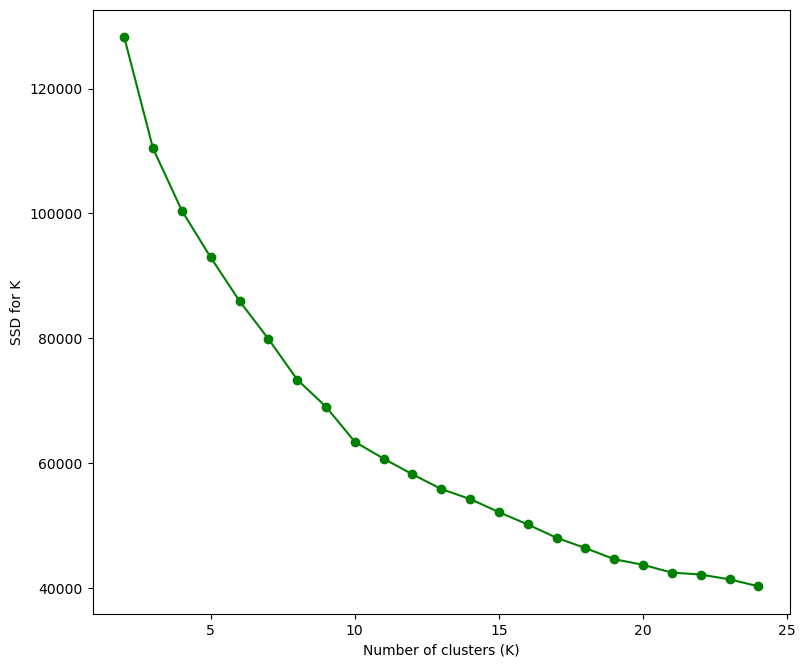

In [4]:
df = pd.read_csv("Data/train_preprocessed.csv")

#Scaling data
tmp_x=df.drop('Transported', axis=1).copy()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(tmp_x)

x=df_scaled.copy()


y=df['Transported']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)


kmeans_model = KMeans(n_clusters=3)
clusters = kmeans_model.fit_predict(X_train)
output= pd.DataFrame(data=X_train, columns= tmp_x.columns.values)
output.insert(output.columns.get_loc("Age"), "Cluster", clusters)
output.describe()
 # Using Elbow Method to find optimal number of clusters
ssd = []
for k in range(2, 25):
    kmeans_model = KMeans(n_clusters=k)
    clusters = kmeans_model.fit_predict(X_train)
    ssd.append(kmeans_model.inertia_)
plt.figure(figsize=(9, 8), dpi=100)
plt.plot(range(2, 25), ssd, color="green", marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSD for K")
plt.show()
# 11 clusters seems okey